# The Uniform Distribution

The uniform distribution is the simplest continuous probability distribution, characterized by constant probability density 
over a defined interval [a,b].

## Key Properties

1. **Definition**: A continuous random variable X has a uniform distribution over [a,b] if its probability density function is:
   * f(x) = 1/(b-a) for a ≤ x ≤ b
   * f(x) = 0 otherwise

2. **Parameters**:
   * a: minimum value (lower bound)
   * b: maximum value (upper bound)

3. **Key Statistics**:
   * E(X) = (a + b)/2
   * Var(X) = (b - a)²/12
   * Median = (a + b)/2
   * Mode: Any value in [a,b]

4. **Properties**:
   * Constant probability density within range
   * Zero probability density outside range
   * Total area under PDF = 1
   * Symmetric around mean

## Cumulative Distribution Function (CDF)
F(x) = 
* 0 for x < a
* (x-a)/(b-a) for a ≤ x ≤ b
* 1 for x > b

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider
import ipywidgets as widgets
import scipy.stats as stats
print("COMPLETE")

COMPLETE


In [4]:
def plot_uniform(a, b):
    """
    Create visualization of uniform distribution with given parameters
    """
    # Create points for plotting
    x = np.linspace(a-1, b+1, 1000)
    
    # Create uniform distribution
    uniform = stats.uniform(loc=a, scale=b-a)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
    
    # Plot PDF
    ax1.plot(x, uniform.pdf(x))
    ax1.fill_between(x, uniform.pdf(x), alpha=0.3)
    ax1.set_title(f'Probability Density Function (PDF)\nUniform({a}, {b})')
    ax1.grid(True)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.set_ylabel('Probability Density')
    
    # Plot CDF
    ax2.plot(x, uniform.cdf(x))
    ax2.set_title('Cumulative Distribution Function (CDF)')
    ax2.grid(True)
    ax2.set_ylabel('Cumulative Probability')
    ax2.set_xlabel('x')
    
    # Add statistics
    stats_text = f'Mean: {uniform.mean():.2f}\n'
    stats_text += f'Variance: {uniform.var():.2f}\n'
    stats_text += f'Std Dev: {uniform.std():.2f}'
    plt.figtext(0.95, 0.95, stats_text, fontsize=10, ha='right', va='top')
    
    plt.tight_layout()
    plt.show()

# Create interactive widget
interactive_plot = interactive(
    plot_uniform,
    a=FloatSlider(min=-5, max=5, step=0.1, value=0, description='a:'),
    b=FloatSlider(min=-5, max=5, step=0.1, value=1, description='b:')
)

## Example: Disease Prevalence

Consider a scenario where we're modeling disease prevalence in a population:
* Minimum prevalence (a) = 1%
* Maximum prevalence (b) = 10%

Key calculations:
1. Expected prevalence = (1 + 10)/2 = 5.5%
2. Probability prevalence > 5% = (10 - 5)/(10 - 1) = 5/9 ≈ 0.556

Try changing the parameters below to explore different scenarios.

In [5]:
# Display the interactive plot
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='a:', max=5.0, min=-5.0), FloatSlider(value=1.0, desc…

## Common Applications

The uniform distribution is used in many real-world scenarios:

1. **Quality Control**:
   * Manufacturing tolerances
   * Measurement errors within bounds

2. **Simulation**:
   * Random number generation
   * Monte Carlo methods

3. **Time Estimation**:
   * Project duration ranges
   * Arrival time windows

4. **Natural Phenomena**:
   * Rainfall amounts within bounds
   * Temperature variations in controlled environments

## Assumptions and Limitations

1. **Key Assumptions**:
   * Equal probability density throughout range
   * Well-defined boundaries
   * Continuous values

2. **Limitations**:
   * Rarely exact in real-world scenarios
   * Assumes no central tendency
   * May oversimplify complex phenomena

## Testing for Uniformity

To test if data follows a uniform distribution:
1. Visual inspection (histogram)
2. Kolmogorov-Smirnov test
3. Chi-square goodness of fit test

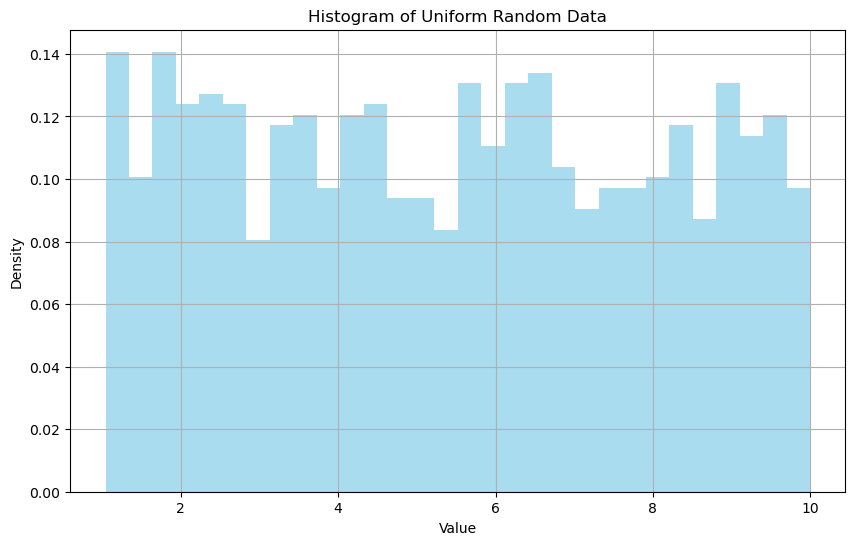

Kolmogorov-Smirnov test:
Statistic: 0.0300
p-value: 0.3244


In [6]:
# Generate some sample uniform data
np.random.seed(42)
data = np.random.uniform(1, 10, 1000)

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7, color='skyblue')
plt.title('Histogram of Uniform Random Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Perform KS test
ks_statistic, p_value = stats.kstest(data, 'uniform', args=(1, 9))
print(f'Kolmogorov-Smirnov test:\nStatistic: {ks_statistic:.4f}\np-value: {p_value:.4f}')